🧵 1. Load dan Preprocessing Fashion MNIST

In [1]:
from keras.datasets import fashion_mnist
import numpy as np

# Load dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Normalisasi pixel (0–255 → 0–1)
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Pisahkan 5000 data pertama untuk validasi
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Reshape menjadi vektor 1D (28x28 = 784 fitur)
X_train = X_train.reshape(-1, 28*28)
X_valid = X_valid.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


🏗️ 2. Membangun Model ANN dengan Keras

In [2]:
from keras import models, layers

model = models.Sequential([
    layers.Dense(300, activation="relu", input_shape=[784]),  # hidden layer 1
    layers.Dense(100, activation="relu"),                     # hidden layer 2
    layers.Dense(10, activation="softmax")                    # output layer (10 kelas)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


⚙️ 3. Compile Model

In [3]:
model.compile(
    loss="sparse_categorical_crossentropy",  # karena label berupa angka 0–9
    optimizer="sgd",                         # Stochastic Gradient Descent
    metrics=["accuracy"]
)

🧪 4. Training Model

In [4]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6762 - loss: 1.0195 - val_accuracy: 0.8290 - val_loss: 0.5091
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8254 - loss: 0.4998 - val_accuracy: 0.8424 - val_loss: 0.4506
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8433 - loss: 0.4478 - val_accuracy: 0.8616 - val_loss: 0.4139
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8513 - loss: 0.4243 - val_accuracy: 0.8706 - val_loss: 0.3859
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8616 - loss: 0.3958 - val_accuracy: 0.8652 - val_loss: 0.3887
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8651 - loss: 0.3807 - val_accuracy: 0.8642 - val_loss: 0.3937
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8710 - loss: 0.3619 - val_accuracy: 0.8730 - val_loss: 0.3634
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8719 - loss: 0.3576 - 

📈 5. Visualisasi Learning Curve

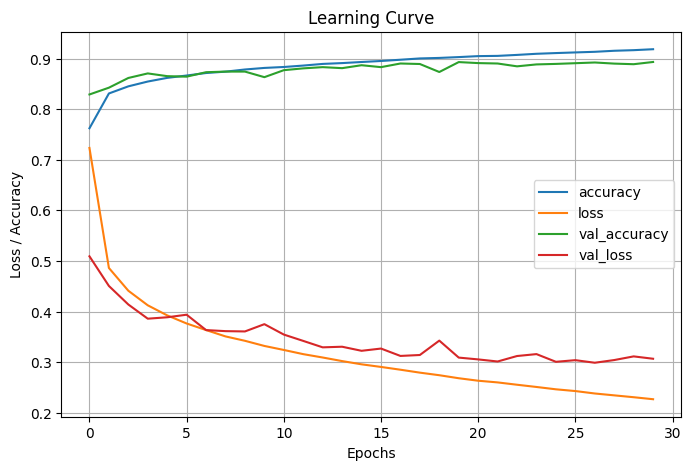

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.title("Learning Curve")
plt.show()

🧾 6. Evaluasi dan Prediksi

In [6]:
# Evaluasi pada data test
test_loss, test_acc = model.evaluate(X_test.reshape(-1, 28*28), y_test)
print("Test Accuracy:", test_acc)

# Prediksi probabilitas
y_proba = model.predict(X_test[:5].reshape(-1, 28*28))
print("Prediksi Probabilitas (5 data pertama):")
print(y_proba)

# Prediksi label
y_pred = np.argmax(y_proba, axis=1)
print("Prediksi Label:", y_pred)
print("Label Sebenarnya:", y_test[:5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8838 - loss: 0.3385
Test Accuracy: 0.8817999958992004
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
Prediksi Probabilitas (5 data pertama):
[[2.90695624e-07 1.25819540e-07 4.16115427e-06 8.69017072e-07
  6.94994651e-06 1.66472383e-02 1.05979836e-06 2.00131070e-02
  3.88333428e-04 9.62937832e-01]
 [4.88887490e-05 6.19450518e-08 9.81303036e-01 3.50361269e-08
  1.77421439e-02 3.92984784e-10 9.05400433e-04 2.39556226e-12
  5.16115051e-07 1.18697543e-12]
 [4.36832806e-06 9.99995232e-01 2.65061395e-08 2.28665172e-07
  1.19119115e-07 9.19111662e-12 2.22064211e-09 1.07236234e-10
  1.54337798e-09 5.57502124e-13]
 [1.19179749e-05 9.99963403e-01 1.80437567e-07 2.34607814e-05
  7.11260213e-07 7.64688757e-09 2.43248195e-07 1.48976942e-09
  1.05915665e-09 1.01104580e-09]
 [3.17504823e-01 1.17101508e-05 6.31295843e-03 3.45018838e-04
  5.01682609e-03 1.06700816e-06 6.70544326e-01 2.62988124e-07
  2.62914400e-04 1.78682640e-07]]
Prediksi Label: [9 2 1 1 6

🔍 7. (Opsional) Label Nama Kelas

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

for i in range(5):
    print(f"Gambar {i}: Prediksi = {class_names[y_pred[i]]}, Asli = {class_names[y_test[i]]}")

Gambar 0: Prediksi = Ankle boot, Asli = Ankle boot
Gambar 1: Prediksi = Pullover, Asli = Pullover
Gambar 2: Prediksi = Trouser, Asli = Trouser
Gambar 3: Prediksi = Trouser, Asli = Trouser
Gambar 4: Prediksi = Shirt, Asli = Shirt


## ✅ Catatan:

* Dataset ini sering digunakan sebagai *benchmark ringan* untuk image classification.
* Model ANN seperti ini bisa ditingkatkan dengan **dropout**, **batch normalization**, atau **early stopping** di bab berikutnya.